In [31]:
import ee
import geemap
import geopandas as gpd
import rasterio
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


In [8]:
Map=geemap.Map(center=[30,78],zoom=5)

In [9]:
in7=gpd.read_file('https://raw.githubusercontent.com/UdayKumar0711/wells/main/parewar.geojson')
# print(type(in7))

In [10]:
fc = geemap.geopandas_to_ee(in7)
# print(type(fc))

In [11]:
roi=fc.geometry()
# print(type(roi))

In [12]:
Esri_lulc=ee.ImageCollection("projects/sat-io/open-datasets/landcover/ESRI_Global-LULC_10m")


In [13]:
vis_params1={'min':1,'max':10,'palette':["#1A5BAB",
    "#358221",
    "#A7D282",
    "#87D19E",
    "#FFDB5C",
    "#EECFA8",
    "#ED022A",
    "#EDE9E4",
    "#F2FAFF",
    "#C8C8C8"]}

legend_dict = {
    '1 Open Water': '1A5BAB',
    '2 Trees': '358221',
    '3 Grass': 'A7D282',
    '4 Flooded Vegetation': '87D19E',
    '5 Crops': 'FFDB5C',
    '6 Shrub': 'EECFA8',
    '7 BuilupArea': 'ED022A',
    '8 BareGround': 'EDE9E4',
    '9 Snow/Ice': 'F2FAFF',
    '10 Cloud': 'C8C8C8',
}


In [14]:
Map.addLayer(Esri_lulc,vis_params1,name='Esri_lulc')

In [15]:
vis_params = {
'min': 0,
'max': 1,
'palette': [ 'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901','66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
          '012E01', '011D01', '011301']}
colors = vis_params['palette']
vmin = vis_params['min']
vmax = vis_params['max']


In [16]:

ndvi_7 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200711")
ndvi_8 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200812")
ndvi_9 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200913")
ndvi_10 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201015")
ndvi_11 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201116")
ndvi_12 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201218")


Map.addLayer(ndvi_7,vis_params,name='ndvi_july')
Map.addLayer(ndvi_8 ,vis_params,name='ndvi_aug ')
Map.addLayer(ndvi_9,vis_params,name='ndvi_sept')
Map.addLayer(ndvi_10,vis_params,name='ndvi_oct')
Map.addLayer(ndvi_11,vis_params,name='ndvi_nov')
Map.addLayer(ndvi_12,vis_params,name='ndvi_dec')


In [17]:
ndvi7 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200711").clip(roi)
ndvi8 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200812").clip(roi)
ndvi9 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200913").clip(roi)
ndvi10 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201015").clip(roi)
ndvi11 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201116").clip(roi)
ndvi12 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201218").clip(roi)

Map.addLayer(ndvi7,vis_params,name='ndvi_july_clipped')
Map.addLayer(ndvi8 ,vis_params,name='ndvi_aug_clipped ')
Map.addLayer(ndvi9,vis_params,name='ndvi_sept_clipped')
Map.addLayer(ndvi10,vis_params,name='ndvi_oct_clipped')
Map.addLayer(ndvi11,vis_params,name='ndvi_nov_clipped')
Map.addLayer(ndvi12,vis_params,name='ndvi_dec_clipped')


In [18]:
print('visualization of NDVI & LULC')

visualization of NDVI & LULC


In [19]:
Map.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, categorical=True, step=8,layer_name="ndvi",position='bottomright')

Map

Map(center=[30, 78], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Tog…

In [20]:
Map.add_legend(legend_title="LULC2020", legend_dict=legend_dict,position='bottomleft')

In [21]:
Map1=geemap.Map(center=[30,78],zoom=5)

In [22]:
ndvi_series = ee.ImageCollection([ndvi_7,ndvi_8,ndvi_9,ndvi_10,ndvi_11,ndvi_12])

In [23]:
layer_names = ['2019_NDVI_month ' + str(months) for months in range(7, 13,1)]

In [24]:
Map1.ts_inspector(left_ts=ndvi_series, right_ts=ndvi_series, left_names=layer_names, right_names=layer_names, left_vis=vis_params, right_vis=vis_params)

In [25]:
print('visualization of temporal changes in NDVI')

visualization of temporal changes in NDVI


In [26]:
Map1

Map(center=[30, 78], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Dropdown(layout=La…

In [27]:
print('Histogram of NDVI')

Histogram of NDVI


In [29]:
print(type(ndvi7))

<class 'ee.image.Image'>


In [34]:
rgb_img = geemap.ee_to_numpy(ndvi7, region=roi)

In [37]:
print(type(rgb_img))

<class 'numpy.ndarray'>


In [38]:
print(rgb_img)

[[[0.07058152]]]


ValueError: x must have 2 or fewer dimensions

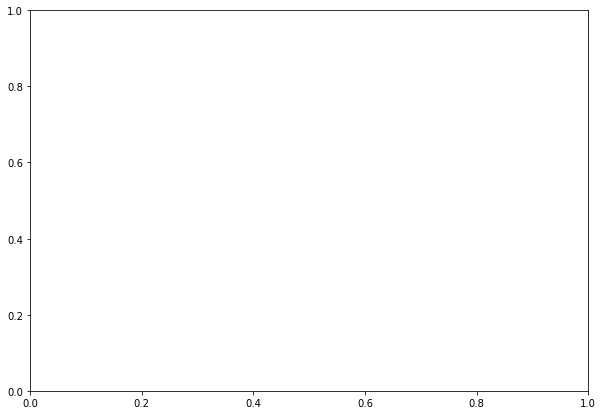

In [36]:
# fig, ax = plt.subplots(figsize =(10, 7))
# plt.hist(rgb_img,bins=[-0.2,-0.1,0.0,0.1,0.15,0.20,0.25,0.3,0.35,0.4,0.5,0.6])
# plt.xlabel("ndvi_value")
# plt.ylabel("no of pixels")
# plt.legend(legend)
# plt.title('Customized histogram')
# plt.tight_layout
# plt.show() 


In [39]:
# geemap.ee_export_image_to_drive(ndvi7, description='ndvi7', folder='https://drive.google.com/drive/folders/1gxiCbZy7o6ea33PUM117taHp7OhENzDh?usp=sharing', region=roi, scale=30)

Exporting ndvi7 ...


In [40]:
# in7=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_224_reproject.tif?raw=true')

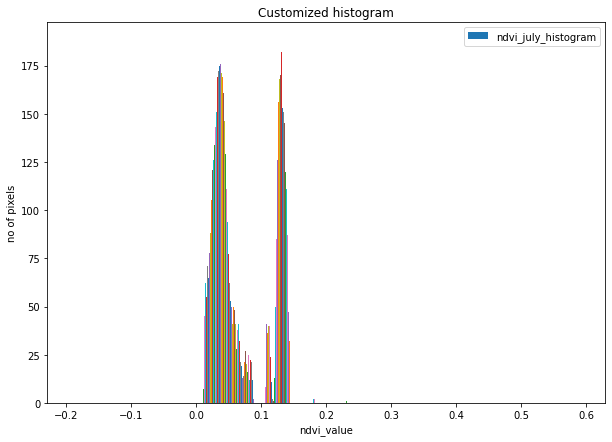

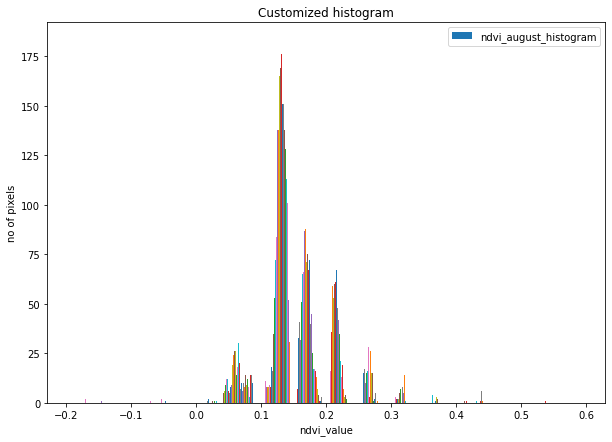

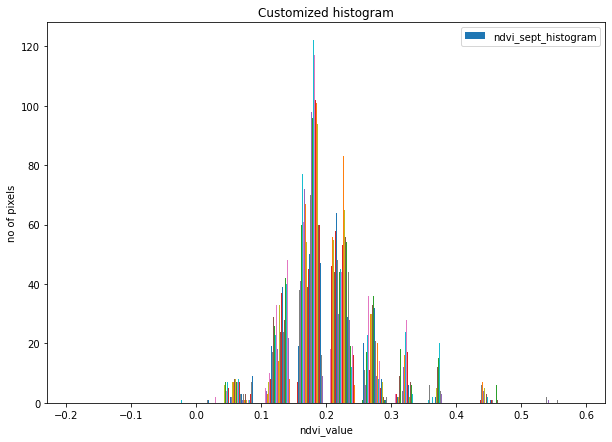

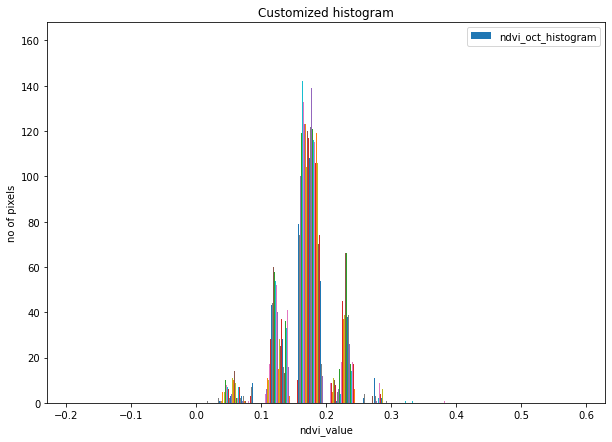

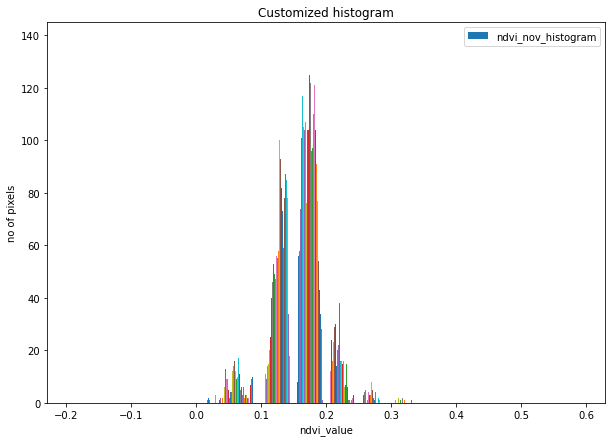

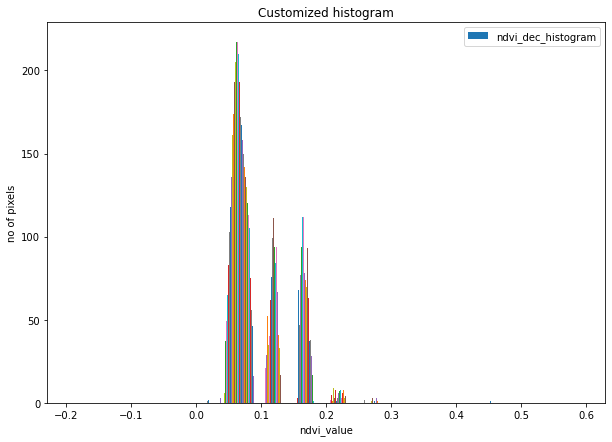

In [41]:
def ndviplot(dataset,name):
 
 dataset1=dataset.read(1)
#  print(dataset1)
#  print(type(dataset1))
#  print(dataset.width)
#  print(dataset.height)
#  n_bins = 5
 legend=['ndvi_'+name+'_histogram']
 fig, ax = plt.subplots(figsize =(10, 7))
 plt.hist(dataset1,bins=[-0.2,-0.1,0.0,0.1,0.15,0.20,0.25,0.3,0.35,0.4,0.5,0.6])
 plt.xlabel("ndvi_value")
 plt.ylabel("no of pixels")
 plt.legend(legend)
 plt.title('Customized histogram')
 plt.tight_layout
 plt.show() 

in7=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_224_reproject.tif?raw=true')

in8=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_256_reproject.tif?raw=true')
in9=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_288_reproject.tif?raw=true')
in10=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_320_reproject.tif?raw=true')
in11=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_352_reproject.tif?raw=true')
in12=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_384_reproject.tif?raw=true')
ndviplot(in7,'july')
ndviplot(in8,'august')
ndviplot(in9,'sept')
ndviplot(in10,'oct')
ndviplot(in11,'nov')
ndviplot(in12,'dec')
